Import Libraries:

The code begins by importing the necessary libraries, including numpy for random number generation and mathematical operations and matplotlib.pyplot for plotting.
Define Functions:

pull_bandit(m): Simulates pulling a bandit arm with an unknown success probability m. It returns a random reward sampled from a normal distribution with mean m.
update_estimate(m_estimate, N, x): Updates the estimated mean m_estimate and the number of pulls N based on the latest reward x.
run_experiment Function:

The main functionality of the program is encapsulated in the run_experiment function, which simulates the bandit problem with multiple bandits.
It takes the following parameters:
m1, m2, m3: The true mean rewards of three bandit arms.
eps: The exploration rate (epsilon) used in the epsilon-greedy strategy.
N: The number of trials or rounds to run the simulation.
The function initializes estimates (m_estimates) and counts (bandit_counts) for each bandit arm.
It also calculates the true best bandit based on the true mean rewards.
It runs the simulation for N trials:
For each trial, it decides whether to explore or exploit using the epsilon-greedy strategy. With probability eps, it explores by selecting a random bandit; otherwise, it exploits by selecting the bandit with the highest estimated mean.
It simulates pulling the selected bandit arm, receives a reward, and updates the estimates and counts for that bandit arm.
It tracks whether the selected bandit arm is suboptimal (different from the true best bandit).
It stores the received reward in the data array for later plotting.
After the simulation, it calculates the cumulative average reward and plots the moving average cumulative reward along with the true mean rewards for each bandit arm.
It prints the estimated means, the percentage of suboptimal choices, and the final results.
Main Execution:

In the __main__ section, the code sets the true mean rewards m1, m2, and m3 and runs the run_experiment function with different exploration rates (eps) to compare their performance.
It plots the results using both log-scale and linear-scale plots.
The main goal of the code is to compare the performance of different exploration rates (epsilon values) in the epsilon-greedy strategy for selecting bandit arms. It visualizes how the cumulative average reward evolves over time and tracks the percentage of suboptimal choices. The epsilon-greedy algorithm balances exploration (trying different bandits) and exploitation (selecting the best-known bandit) to maximize the cumulative reward.

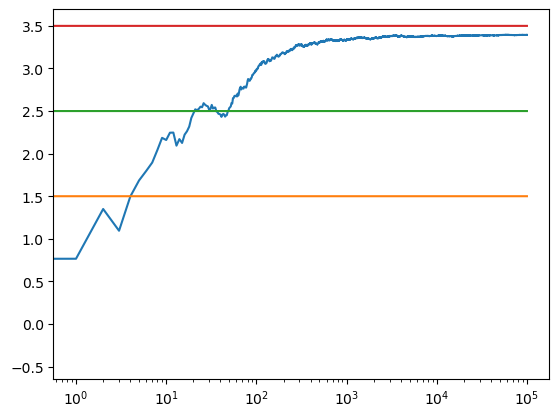

1.4994903590911746
2.4834307361227346
3.4980104365257954
percent suboptimal for epsilon = 0.1 : 0.06899


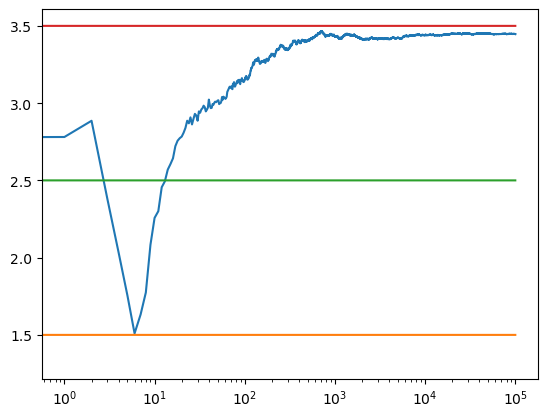

1.5281314554508718
2.4724352484135843
3.496660539892328
percent suboptimal for epsilon = 0.05 : 0.03316


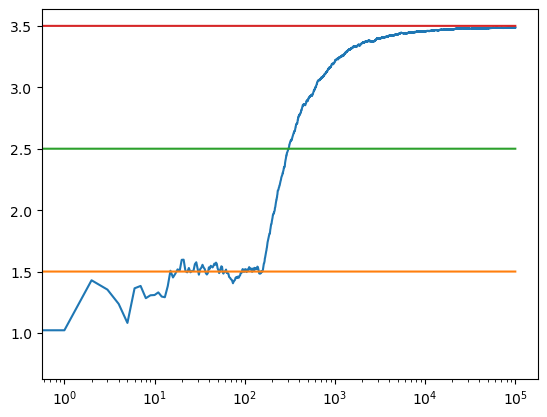

1.5340549415965792
2.5242197946164673
3.4989745274974893
percent suboptimal for epsilon = 0.01 : 0.00791


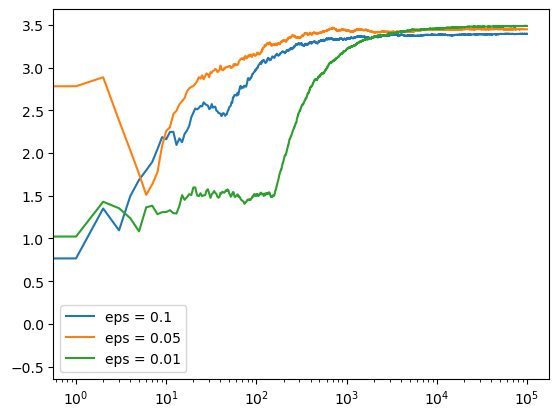

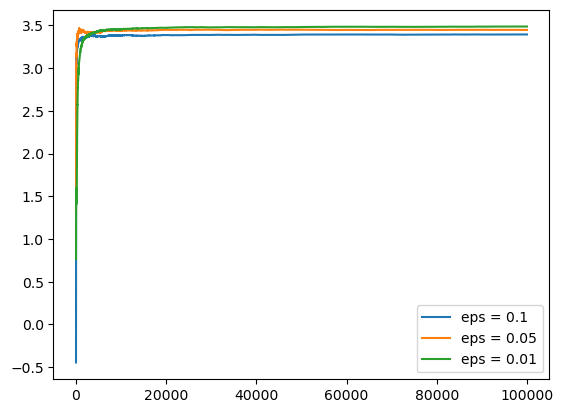

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def pull_bandit(m):
    return np.random.randn() + m

def update_estimate(m_estimate, N, x):
    N += 1
    m_estimate = (1 - 1.0 / N) * m_estimate + 1.0 / N * x
    return m_estimate, N

def run_experiment(m1, m2, m3, eps, N):
    m_estimates = [0, 0, 0]
    bandit_counts = [0, 0, 0]

    # count number of suboptimal choices
    means = np.array([m1, m2, m3])
    true_best = np.argmax(means)
    count_suboptimal = 0

    data = np.empty(N)
    
    for i in range(N):
        # epsilon greedy
        p = np.random.random()
        if p < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax(m_estimates)
        x = pull_bandit([m1, m2, m3][j])
        m_estimates[j], bandit_counts[j] = update_estimate(m_estimates[j], bandit_counts[j], x)

        if j != true_best:
            count_suboptimal += 1

        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N) * m1)
    plt.plot(np.ones(N) * m2)
    plt.plot(np.ones(N) * m3)
    plt.xscale('log')
    plt.show()

    for m_estimate in m_estimates:
        print(m_estimate)

    print("percent suboptimal for epsilon =", eps, ":", float(count_suboptimal) / N)

    return cumulative_average

if __name__ == '__main__':
    m1, m2, m3 = 1.5, 2.5, 3.5
    c_1 = run_experiment(m1, m2, m3, 0.1, 100000)
    c_05 = run_experiment(m1, m2, m3, 0.05, 100000)
    c_01 = run_experiment(m1, m2, m3, 0.01, 100000)

    # log scale plot
    plt.plot(c_1, label='eps = 0.1')
    plt.plot(c_05, label='eps = 0.05')
    plt.plot(c_01, label='eps = 0.01')
    plt.legend()
    plt.xscale('log')
    plt.show()

    # linear plot
    plt.plot(c_1, label='eps = 0.1')
    plt.plot(c_05, label='eps = 0.05')
    plt.plot(c_01, label='eps = 0.01')
    plt.legend()
    plt.show()
